<a href="https://colab.research.google.com/github/Sunidhi-Gautam/FL_Implementation/blob/main/FL_Hybrid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sunidhigautam26","key":"df9c2dd0e0f5995bb0a2fd692c71ec16"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

**Imports for the Dataset Download**

In [4]:
import os
import shutil
import random
import zipfile

**Dataset 1: Tomato Village**

In [5]:
!git clone https://github.com/mamta-joshi-gehlot/Tomato-Village.git /content/tmp_tomato_village

Cloning into '/content/tmp_tomato_village'...
remote: Enumerating objects: 45041, done.
remote: Counting objects: 100% (26934/26934), done.
remote: Compressing objects: 100% (15220/15220), done.
remote: Total 45041 (delta 11469), reused 26919 (delta 11462), pack-reused 18107 (from 1)
Receiving objects: 100% (45041/45041), 3.15 GiB | 47.07 MiB/s, done.
Resolving deltas: 100% (14334/14334), done.
Updating files: 100% (53289/53289), done.


In [6]:
base = "/content/tmp_tomato_village"

for root, dirs, files in os.walk(base):
    # print only directories with image files underneath
    if any(f.lower().endswith((".jpg", ".png", ".jpeg")) for f in files):
        print(root)


/content/tmp_tomato_village/Variant-c(Object Detection)/train/images
/content/tmp_tomato_village/Variant-c(Object Detection)/val/images
/content/tmp_tomato_village/Variant-b(MultiLabel Classification)/test
/content/tmp_tomato_village/Variant-b(MultiLabel Classification)/train
/content/tmp_tomato_village/Variant-b(MultiLabel Classification)/val
/content/tmp_tomato_village/Variant-a(Multiclass Classification)/test/Nitrogen Deficiency
/content/tmp_tomato_village/Variant-a(Multiclass Classification)/test/Healthy
/content/tmp_tomato_village/Variant-a(Multiclass Classification)/test/Magnesium Deficiency
/content/tmp_tomato_village/Variant-a(Multiclass Classification)/test/Early_blight
/content/tmp_tomato_village/Variant-a(Multiclass Classification)/test/Late_blight
/content/tmp_tomato_village/Variant-a(Multiclass Classification)/test/Spotted Wilt Virus
/content/tmp_tomato_village/Variant-a(Multiclass Classification)/test/Pottassium Deficiency
/content/tmp_tomato_village/Variant-a(Multiclass 

In [7]:
SRC_BASE = "/content/tmp_tomato_village/Variant-a(Multiclass Classification)"
CLIENT_ID = "client_0"
DEST_BASE = os.path.join("/content/clients", CLIENT_ID)

# Create client folder
os.makedirs(DEST_BASE, exist_ok=True)

# Copy splits
for split in ["train", "val", "test"]:
    src_split = os.path.join(SRC_BASE, split)
    dst_split = os.path.join(DEST_BASE, split)
    if os.path.exists(src_split):
        shutil.copytree(src_split, dst_split)
        print(f"Copied {split} → {dst_split}")
    else:
        print(f"{split} not found")

Copied train → /content/clients/client_0/train
Copied val → /content/clients/client_0/val
Copied test → /content/clients/client_0/test


In [8]:
client0 = "/content/clients/client_0"
for split in ["train", "val", "test"]:
    print(f"\n{split} classes:")
    for cls in sorted(os.listdir(os.path.join(client0, split))):
        count = len(os.listdir(os.path.join(client0, split, cls)))
        print(f"  {cls}: {count} images")


train classes:
  Early_blight: 347 images
  Healthy: 151 images
  Late_blight: 632 images
  Leaf Miner: 716 images
  Magnesium Deficiency: 655 images
  Nitrogen Deficiency: 251 images
  Pottassium Deficiency: 50 images
  Spotted Wilt Virus: 361 images

val classes:
  Early_blight: 99 images
  Healthy: 43 images
  Late_blight: 180 images
  Leaf Miner: 204 images
  Magnesium Deficiency: 187 images
  Nitrogen Deficiency: 72 images
  Pottassium Deficiency: 14 images
  Spotted Wilt Virus: 103 images

test classes:
  Early_blight: 50 images
  Healthy: 22 images
  Late_blight: 92 images
  Leaf Miner: 104 images
  Magnesium Deficiency: 95 images
  Nitrogen Deficiency: 37 images
  Pottassium Deficiency: 8 images
  Spotted Wilt Virus: 53 images


**Dataset 2: Kaggle Dataset 1**

In [9]:
!kaggle datasets download -d kaustubhb999/tomatoleaf -p /content

Dataset URL: https://www.kaggle.com/datasets/kaustubhb999/tomatoleaf
License(s): CC0-1.0
 86% 153M/179M [00:00<00:00, 1.59GB/s]
100% 179M/179M [00:00<00:00, 1.19GB/s]


In [10]:
zip_path = "/content/tomatoleaf.zip"
extract_to = "/content/tmp_tomatoleaf"

with zipfile.ZipFile(zip_path, "r") as z:
    z.extractall(extract_to)

print("Extracted to", extract_to)

Extracted to /content/tmp_tomatoleaf


In [11]:
base = "/content/tmp_tomatoleaf"
for root, dirs, files in os.walk(base):
    # Print directories that contain image files
    if any(f.lower().endswith((".jpg", ".jpeg", ".png")) for f in files):
        print(root)

/content/tmp_tomatoleaf/tomato/train/Tomato___Septoria_leaf_spot
/content/tmp_tomatoleaf/tomato/train/Tomato___Leaf_Mold
/content/tmp_tomatoleaf/tomato/train/Tomato___Bacterial_spot
/content/tmp_tomatoleaf/tomato/train/Tomato___Tomato_mosaic_virus
/content/tmp_tomatoleaf/tomato/train/Tomato___healthy
/content/tmp_tomatoleaf/tomato/train/Tomato___Target_Spot
/content/tmp_tomatoleaf/tomato/train/Tomato___Late_blight
/content/tmp_tomatoleaf/tomato/train/Tomato___Spider_mites Two-spotted_spider_mite
/content/tmp_tomatoleaf/tomato/train/Tomato___Early_blight
/content/tmp_tomatoleaf/tomato/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus
/content/tmp_tomatoleaf/tomato/val/Tomato___Septoria_leaf_spot
/content/tmp_tomatoleaf/tomato/val/Tomato___Leaf_Mold
/content/tmp_tomatoleaf/tomato/val/Tomato___Bacterial_spot
/content/tmp_tomatoleaf/tomato/val/Tomato___Tomato_mosaic_virus
/content/tmp_tomatoleaf/tomato/val/Tomato___healthy
/content/tmp_tomatoleaf/tomato/val/Tomato___Target_Spot
/content/tmp_tom

In [12]:
SRC_BASE = "/content/tmp_tomatoleaf/tomato"
CLIENT_ID = "client_1"
DEST_BASE = os.path.join("/content/clients", CLIENT_ID)
os.makedirs(DEST_BASE, exist_ok=True)

# Create splits
splits = ["train", "val", "test"]
for split in splits:
    os.makedirs(os.path.join(DEST_BASE, split), exist_ok=True)

# Move existing train/val
for split in ["train", "val"]:
    src_split = os.path.join(SRC_BASE, split)
    for cls in os.listdir(src_split):
        src_cls = os.path.join(src_split, cls)
        dst_cls = os.path.join(DEST_BASE, split, cls)
        shutil.copytree(src_cls, dst_cls)
        print(f"Copied {split}/{cls} → {dst_cls}")

# Create test split from a fraction of train images
test_ratio = 0.15  # 15% of train images per class
train_path = os.path.join(DEST_BASE, "train")
test_path = os.path.join(DEST_BASE, "test")

for cls in os.listdir(train_path):
    cls_train_path = os.path.join(train_path, cls)
    cls_test_path = os.path.join(test_path, cls)
    os.makedirs(cls_test_path, exist_ok=True)

    images = [f for f in os.listdir(cls_train_path) if os.path.isfile(os.path.join(cls_train_path, f))]
    n_test = int(len(images) * test_ratio)
    test_images = random.sample(images, n_test)

    for img in test_images:
        shutil.move(os.path.join(cls_train_path, img), os.path.join(cls_test_path, img))

print("\nclient_1 train/val/test organized with class folders.")


Copied train/Tomato___Septoria_leaf_spot → /content/clients/client_1/train/Tomato___Septoria_leaf_spot
Copied train/Tomato___Leaf_Mold → /content/clients/client_1/train/Tomato___Leaf_Mold
Copied train/Tomato___Bacterial_spot → /content/clients/client_1/train/Tomato___Bacterial_spot
Copied train/Tomato___Tomato_mosaic_virus → /content/clients/client_1/train/Tomato___Tomato_mosaic_virus
Copied train/Tomato___healthy → /content/clients/client_1/train/Tomato___healthy
Copied train/Tomato___Target_Spot → /content/clients/client_1/train/Tomato___Target_Spot
Copied train/Tomato___Late_blight → /content/clients/client_1/train/Tomato___Late_blight
Copied train/Tomato___Spider_mites Two-spotted_spider_mite → /content/clients/client_1/train/Tomato___Spider_mites Two-spotted_spider_mite
Copied train/Tomato___Early_blight → /content/clients/client_1/train/Tomato___Early_blight
Copied train/Tomato___Tomato_Yellow_Leaf_Curl_Virus → /content/clients/client_1/train/Tomato___Tomato_Yellow_Leaf_Curl_Viru

In [13]:
client1 = "/content/clients/client_1"
for split in ["train","val","test"]:
    print(f"\n{split} classes:")
    for cls in sorted(os.listdir(os.path.join(client1, split))):
        count = len(os.listdir(os.path.join(client1, split, cls)))
        print(f"  {cls}: {count} images")


train classes:
  Tomato___Bacterial_spot: 850 images
  Tomato___Early_blight: 850 images
  Tomato___Late_blight: 850 images
  Tomato___Leaf_Mold: 850 images
  Tomato___Septoria_leaf_spot: 850 images
  Tomato___Spider_mites Two-spotted_spider_mite: 850 images
  Tomato___Target_Spot: 850 images
  Tomato___Tomato_Yellow_Leaf_Curl_Virus: 850 images
  Tomato___Tomato_mosaic_virus: 850 images
  Tomato___healthy: 850 images

val classes:
  Tomato___Bacterial_spot: 100 images
  Tomato___Early_blight: 100 images
  Tomato___Late_blight: 100 images
  Tomato___Leaf_Mold: 100 images
  Tomato___Septoria_leaf_spot: 100 images
  Tomato___Spider_mites Two-spotted_spider_mite: 100 images
  Tomato___Target_Spot: 100 images
  Tomato___Tomato_Yellow_Leaf_Curl_Virus: 100 images
  Tomato___Tomato_mosaic_virus: 100 images
  Tomato___healthy: 100 images

test classes:
  Tomato___Bacterial_spot: 150 images
  Tomato___Early_blight: 150 images
  Tomato___Late_blight: 150 images
  Tomato___Leaf_Mold: 150 images
 

**Dataset 3: Kaggle Dataset 2**

In [14]:
!kaggle datasets download -d ashishmotwani/tomato -p /content

Dataset URL: https://www.kaggle.com/datasets/ashishmotwani/tomato
License(s): copyright-authors
 92% 1.26G/1.37G [00:12<00:04, 24.3MB/s]
100% 1.37G/1.37G [00:13<00:00, 113MB/s] 


In [15]:
zip_path = "/content/tomato.zip"
extract_to = "/content/tmp_tomato_3"

with zipfile.ZipFile(zip_path, "r") as z:
    z.extractall(extract_to)

print("Extracted to /content/tmp_tomato_3")

Extracted to /content/tmp_tomato_3


In [16]:
base = "/content/tmp_tomato_3"
for root, dirs, files in os.walk(base):
    # print directories that contain image files
    if any(f.lower().endswith((".jpg", ".jpeg", ".png")) for f in files):
        print(root)

/content/tmp_tomato_3/train/Bacterial_spot
/content/tmp_tomato_3/train/powdery_mildew
/content/tmp_tomato_3/train/Target_Spot
/content/tmp_tomato_3/train/Leaf_Mold
/content/tmp_tomato_3/train/healthy
/content/tmp_tomato_3/train/Tomato_mosaic_virus
/content/tmp_tomato_3/train/Early_blight
/content/tmp_tomato_3/train/Late_blight
/content/tmp_tomato_3/train/Tomato_Yellow_Leaf_Curl_Virus
/content/tmp_tomato_3/train/Spider_mites Two-spotted_spider_mite
/content/tmp_tomato_3/train/Septoria_leaf_spot
/content/tmp_tomato_3/valid/Bacterial_spot
/content/tmp_tomato_3/valid/powdery_mildew
/content/tmp_tomato_3/valid/Target_Spot
/content/tmp_tomato_3/valid/Leaf_Mold
/content/tmp_tomato_3/valid/healthy
/content/tmp_tomato_3/valid/Tomato_mosaic_virus
/content/tmp_tomato_3/valid/Early_blight
/content/tmp_tomato_3/valid/Late_blight
/content/tmp_tomato_3/valid/Tomato_Yellow_Leaf_Curl_Virus
/content/tmp_tomato_3/valid/Spider_mites Two-spotted_spider_mite
/content/tmp_tomato_3/valid/Septoria_leaf_spot


In [17]:
SRC_BASE = "/content/tmp_tomato_3"
CLIENT_ID = "client_2"
DEST_BASE = os.path.join("/content/clients", CLIENT_ID)
os.makedirs(DEST_BASE, exist_ok=True)

# Create split folders
for split in ["train","val","test"]:
    os.makedirs(os.path.join(DEST_BASE, split), exist_ok=True)

# Copy existing train/val
for split in ["train", "valid"]:
    src_split = os.path.join(SRC_BASE, split)
    dst_split = os.path.join(DEST_BASE, "train" if split=="train" else "val")

    for cls in os.listdir(src_split):
        src_cls = os.path.join(src_split, cls)
        dst_cls = os.path.join(dst_split, cls)
        shutil.copytree(src_cls, dst_cls)
        print(f"Copied {split}/{cls} → {dst_cls}")

# Create test split from 15% of train images
test_ratio = 0.15
train_path = os.path.join(DEST_BASE, "train")
test_path = os.path.join(DEST_BASE, "test")

for cls in os.listdir(train_path):
    cls_train_path = os.path.join(train_path, cls)
    cls_test_path = os.path.join(test_path, cls)
    os.makedirs(cls_test_path, exist_ok=True)

    images = [f for f in os.listdir(cls_train_path) if os.path.isfile(os.path.join(cls_train_path, f))]
    n_test = int(len(images) * test_ratio)
    test_images = random.sample(images, n_test)

    for img in test_images:
        shutil.move(os.path.join(cls_train_path, img), os.path.join(cls_test_path, img))

print("\nclient_2 train/val/test organized with class folders.")

Copied train/Bacterial_spot → /content/clients/client_2/train/Bacterial_spot
Copied train/powdery_mildew → /content/clients/client_2/train/powdery_mildew
Copied train/Target_Spot → /content/clients/client_2/train/Target_Spot
Copied train/Leaf_Mold → /content/clients/client_2/train/Leaf_Mold
Copied train/healthy → /content/clients/client_2/train/healthy
Copied train/Tomato_mosaic_virus → /content/clients/client_2/train/Tomato_mosaic_virus
Copied train/Early_blight → /content/clients/client_2/train/Early_blight
Copied train/Late_blight → /content/clients/client_2/train/Late_blight
Copied train/Tomato_Yellow_Leaf_Curl_Virus → /content/clients/client_2/train/Tomato_Yellow_Leaf_Curl_Virus
Copied train/Spider_mites Two-spotted_spider_mite → /content/clients/client_2/train/Spider_mites Two-spotted_spider_mite
Copied train/Septoria_leaf_spot → /content/clients/client_2/train/Septoria_leaf_spot
Copied valid/Bacterial_spot → /content/clients/client_2/val/Bacterial_spot
Copied valid/powdery_milde

In [18]:
client2 = "/content/clients/client_2"
for split in ["train","val","test"]:
    print(f"\n{split} classes:")
    for cls in sorted(os.listdir(os.path.join(client2, split))):
        count = len(os.listdir(os.path.join(client2, split, cls)))
        print(f"  {cls}: {count} images")


train classes:
  Bacterial_spot: 2403 images
  Early_blight: 2087 images
  Late_blight: 2647 images
  Leaf_Mold: 2341 images
  Septoria_leaf_spot: 2450 images
  Spider_mites Two-spotted_spider_mite: 1485 images
  Target_Spot: 1553 images
  Tomato_Yellow_Leaf_Curl_Virus: 1734 images
  Tomato_mosaic_virus: 1831 images
  healthy: 2594 images
  powdery_mildew: 854 images

val classes:
  Bacterial_spot: 732 images
  Early_blight: 643 images
  Late_blight: 792 images
  Leaf_Mold: 739 images
  Septoria_leaf_spot: 746 images
  Spider_mites Two-spotted_spider_mite: 435 images
  Target_Spot: 457 images
  Tomato_Yellow_Leaf_Curl_Virus: 498 images
  Tomato_mosaic_virus: 584 images
  healthy: 805 images
  powdery_mildew: 252 images

test classes:
  Bacterial_spot: 423 images
  Early_blight: 368 images
  Late_blight: 466 images
  Leaf_Mold: 413 images
  Septoria_leaf_spot: 432 images
  Spider_mites Two-spotted_spider_mite: 262 images
  Target_Spot: 274 images
  Tomato_Yellow_Leaf_Curl_Virus: 305 im

**Dataset 4: Kaggle Dataset 3**

In [19]:
!kaggle datasets download -d luisolazo/tomato-diseases -p /content

Dataset URL: https://www.kaggle.com/datasets/luisolazo/tomato-diseases
License(s): CC0-1.0
 99% 407M/411M [00:02<00:00, 92.7MB/s]
100% 411M/411M [00:02<00:00, 150MB/s] 


In [20]:
zip_path = "/content/tomato-diseases.zip"
extract_to = "/content/tmp_tomato_diseases"

with zipfile.ZipFile(zip_path, "r") as z:
    z.extractall(extract_to)

print("Extracted to:", extract_to)

Extracted to: /content/tmp_tomato_diseases


In [21]:
base = "/content/tmp_tomato_diseases"
for root, dirs, files in os.walk(base):
    # show only directories that contain image files
    if any(f.lower().endswith((".jpg", ".jpeg", ".png")) for f in files):
        print(root)

/content/tmp_tomato_diseases/test/twospotted_spider_mite
/content/tmp_tomato_diseases/test/bacterial_spot
/content/tmp_tomato_diseases/test/yellow_leaf_curl_virus
/content/tmp_tomato_diseases/test/healthy
/content/tmp_tomato_diseases/test/leaf_mold
/content/tmp_tomato_diseases/test/early_blight
/content/tmp_tomato_diseases/test/target_spot
/content/tmp_tomato_diseases/test/mosaic_virus
/content/tmp_tomato_diseases/test/septoria_leaf_spot
/content/tmp_tomato_diseases/test/late_blight
/content/tmp_tomato_diseases/train/twospotted_spider_mite
/content/tmp_tomato_diseases/train/bacterial_spot
/content/tmp_tomato_diseases/train/yellow_leaf_curl_virus
/content/tmp_tomato_diseases/train/healthy
/content/tmp_tomato_diseases/train/leaf_mold
/content/tmp_tomato_diseases/train/early_blight
/content/tmp_tomato_diseases/train/target_spot
/content/tmp_tomato_diseases/train/mosaic_virus
/content/tmp_tomato_diseases/train/septoria_leaf_spot
/content/tmp_tomato_diseases/train/late_blight


In [22]:
SRC_BASE = "/content/tmp_tomato_diseases"
CLIENT_ID = "client_3"
DEST_BASE = os.path.join("/content/clients", CLIENT_ID)
os.makedirs(DEST_BASE, exist_ok=True)

splits = ["train", "val", "test"]
for s in splits:
    os.makedirs(os.path.join(DEST_BASE, s), exist_ok=True)

random.seed(42)

# Only these folders are real classes
real_classes = [
    "bacterial_spot",
    "early_blight",
    "healthy",
    "late_blight",
    "leaf_mold",
    "mosaic_virus",
    "septoria_leaf_spot",
    "target_spot",
    "twospotted_spider_mite",
    "yellow_leaf_curl_virus"
]

def copy_split(split):
    src_split = os.path.join(SRC_BASE, split)
    for cls in real_classes:
        src_cls = os.path.join(src_split, cls)
        if not os.path.exists(src_cls):
            print(f"⚠️ {cls} missing in {split}, skipping")
            continue
        dst_cls = os.path.join(DEST_BASE, split, cls)
        os.makedirs(dst_cls, exist_ok=True)
        for img in os.listdir(src_cls):
            shutil.copy(os.path.join(src_cls, img), os.path.join(dst_cls, img))

# Train and val: split train folder 90/10
for cls in real_classes:
    src_cls = os.path.join(SRC_BASE, "train", cls)
    if not os.path.exists(src_cls):
        continue
    images = os.listdir(src_cls)
    random.shuffle(images)
    val_count = int(0.1 * len(images))
    train_imgs = images[val_count:]
    val_imgs = images[:val_count]

    dst_train_cls = os.path.join(DEST_BASE, "train", cls)
    dst_val_cls = os.path.join(DEST_BASE, "val", cls)
    os.makedirs(dst_train_cls, exist_ok=True)
    os.makedirs(dst_val_cls, exist_ok=True)

    for img in train_imgs:
        shutil.copy(os.path.join(src_cls, img), os.path.join(dst_train_cls, img))
    for img in val_imgs:
        shutil.copy(os.path.join(src_cls, img), os.path.join(dst_val_cls, img))

# Test: copy only real classes
copy_split("test")

print(f"\nclient_3 ready at {DEST_BASE} with only the 10 real classes (IMG ignored).")


client_3 ready at /content/clients/client_3 with only the 10 real classes (IMG ignored).


In [23]:
for split in ["train", "val", "test"]:
    print(f"\n{split} classes and counts:")
    for cls in sorted(os.listdir(os.path.join(DEST_BASE, split))):
        count = len(os.listdir(os.path.join(DEST_BASE, split, cls)))
        print(f"  {cls}: {count} images")



train classes and counts:
  bacterial_spot: 1512 images
  early_blight: 1960 images
  healthy: 1695 images
  late_blight: 1884 images
  leaf_mold: 1314 images
  mosaic_virus: 1078 images
  septoria_leaf_spot: 1195 images
  target_spot: 999 images
  twospotted_spider_mite: 1109 images
  yellow_leaf_curl_virus: 3236 images

val classes and counts:
  bacterial_spot: 167 images
  early_blight: 217 images
  healthy: 188 images
  late_blight: 209 images
  leaf_mold: 146 images
  mosaic_virus: 119 images
  septoria_leaf_spot: 132 images
  target_spot: 111 images
  twospotted_spider_mite: 123 images
  yellow_leaf_curl_virus: 359 images

test classes and counts:
  bacterial_spot: 444 images
  early_blight: 444 images
  healthy: 444 images
  late_blight: 444 images
  leaf_mold: 444 images
  mosaic_virus: 444 images
  septoria_leaf_spot: 444 images
  target_spot: 444 images
  twospotted_spider_mite: 444 images
  yellow_leaf_curl_virus: 444 images


**Per-Client Distribution**

In [24]:
CLIENTS_DIR = "/content/clients"
clients = sorted(os.listdir(CLIENTS_DIR))

print(f"{'Client':<10} | {'Classes':<7} | {'Train images':<12} | {'Val images':<10} | {'Test images':<11}")
print("-"*65)

for client in clients:
    client_path = os.path.join(CLIENTS_DIR, client)
    splits = ["train", "val", "test"]
    class_count = 0
    split_counts = {}

    for split in splits:
        split_path = os.path.join(client_path, split)
        if not os.path.exists(split_path):
            split_counts[split] = 0
            continue

        classes = [d for d in os.listdir(split_path) if os.path.isdir(os.path.join(split_path, d))]
        if split == "train":
            class_count = len(classes)  # assuming all splits have same classes
        # count images in all class folders
        total_images = sum(len(os.listdir(os.path.join(split_path, c))) for c in classes)
        split_counts[split] = total_images

    print(f"{client:<10} | {class_count:<7} | {split_counts['train']:<12} | {split_counts['val']:<10} | {split_counts['test']:<11}")


Client     | Classes | Train images | Val images | Test images
-----------------------------------------------------------------
client_0   | 8       | 3163         | 902        | 461        
client_1   | 10      | 8500         | 1000       | 1500       
client_2   | 11      | 21979        | 6683       | 3872       
client_3   | 10      | 15982        | 1771       | 4440       


**Resnet**

In [38]:
import os
import pickle
import numpy as np
from collections import defaultdict

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Subset
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torchvision import datasets
from torchvision import models

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [39]:
def extract_features_from_loader(model, loader):
    extractor = get_feature_extractor(model)
    extractor.eval()

    all_feats = []
    all_labels = []

    with torch.no_grad():
        for imgs, labels in loader:
            imgs = imgs.to(device)
            feats = extractor(imgs).squeeze(-1).squeeze(-1)
            all_feats.append(feats.cpu().numpy())
            all_labels.extend(labels.numpy())

    X = np.vstack(all_feats)
    y = np.array(all_labels)

    return X, y

In [40]:
GLOBAL_LABEL_MAP = {
    # Early blight
    "early_blight": "early_blight",
    "Early_blight": "early_blight",
    "Early Blight": "early_blight",
    "tomato___early_blight": "early_blight",
    "tomato__early blight": "early_blight",
    "EARLY-BLIGHT": "early_blight",

    # Late blight
    "late_blight": "late_blight",
    "Late_blight": "late_blight",
    "Late Blight": "late_blight",
    "tomato___late_blight": "late_blight",
    "tomato__late blight": "late_blight",

    # Bacterial spot
    "bacterial_spot": "bacterial_spot",
    "Bacterial Spot": "bacterial_spot",
    "Tomato___Bacterial_spot": "bacterial_spot",
    "Tomato_bacterial_spot": "bacterial_spot",

    # Leaf mold
    "leaf_mold": "leaf_mold",
    "Leaf Mold": "leaf_mold",
    "Leaf_Mold": "leaf_mold",
    "tomato___Leaf_Mold": "leaf_mold",

    # Healthy
    "healthy": "healthy",
    "Healthy": "healthy",
    "Tomato___healthy": "healthy",

    # Target spot
    "target_spot": "target_spot",
    "Target Spot": "target_spot",
    "Target_Spot": "target_spot",
    "target_spot___": "target_spot",
    "tomato___Target_Spot": "target_spot",

    # Powdery Mildew
    "powdery_mildew": "powdery_mildew",
    "Powdery Mildew": "powdery_mildew",
    "Powdery_mildew": "powdery_mildew",
    "Powdery_Mildew": "powdery_mildew",

    # Septoria Leaf Spot
    "septoria_leaf_spot": "septoria_leaf_spot",
    "Septoria Leaf Spot": "septoria_leaf_spot",
    "Septorialeafspot": "septoria_leaf_spot",
    "tomato___Septoria_leaf_spot": "septoria_leaf_spot",

    # Mosaic virus
    "mosaic_virus": "mosaic_virus",
    "Tomato_mosaic_virus": "mosaic_virus",
    "tomato_mosaic_virus": "mosaic_virus",
    "Tomato mosaic virus": "mosaic_virus",
    "tomato___Tomato_mosaic_virus": "mosaic_virus",

    # Spider mites (Two-spotted)
    "spider_mites_two_spotted_spider_mite": "spider_mites",
    "Spider Mites Two-spotted spider_mite": "spider_mites",
    "Spider_mites": "spider_mites",
    "spider_mites": "spider_mites",
    "twospotted_spider_mite": "spider_mites",
    "Tomato___Spider_mites Two-spotted_spider_mite": "spider_mites",

    # Yellow Leaf Curl Virus
    "yellow_leaf_curl_virus": "yellow_leaf_curl_virus",
    "TomatoYellowLeafCurlVirus": "yellow_leaf_curl_virus",
    "Tomato_Yellow_Leaf_Curl_Virus": "yellow_leaf_curl_virus",
    "Yellow Leaf Curl Virus": "yellow_leaf_curl_virus",
    "tomato___Tomato_Yellow_Leaf_Curl_Virus": "yellow_leaf_curl_virus",

    # Leaf Miner
    "leaf_miner": "leaf_miner",
    "Leaf Miner": "leaf_miner",
    "leaf miner": "leaf_miner",

    # Nitrogen deficiency
    "nitrogen_deficiency": "nitrogen_deficiency",
    "Nitrogen Deficiency": "nitrogen_deficiency",

    # Potassium deficiency
    "potassium_deficiency": "potassium_deficiency",
    "Pottassium Deficiency": "potassium_deficiency",
    "Potassium Deficiency": "potassium_deficiency",

    # Magnesium deficiency
    "magnesium_deficiency": "magnesium_deficiency",
    "Magnesium Deficiency": "magnesium_deficiency",

    # Spotted Wilt Virus
    "spotted_wilt_virus": "spotted_wilt_virus",
    "Spotted Wilt Virus": "spotted_wilt_virus",
    "Spotted_Wilt_Virus": "spotted_wilt_virus",
    "Spotted wilt virus": "spotted_wilt_virus",
}

In [41]:
GLOBAL_CLASSES = sorted(set(GLOBAL_LABEL_MAP.values()))
print("Global classes:", GLOBAL_CLASSES)
GLOBAL_CLASS_TO_IDX = {c: i for i, c in enumerate(GLOBAL_CLASSES)}
IDX_TO_CLASS = {i: c for c, i in GLOBAL_CLASS_TO_IDX.items()}

Global classes: ['bacterial_spot', 'early_blight', 'healthy', 'late_blight', 'leaf_miner', 'leaf_mold', 'magnesium_deficiency', 'mosaic_virus', 'nitrogen_deficiency', 'potassium_deficiency', 'powdery_mildew', 'septoria_leaf_spot', 'spider_mites', 'spotted_wilt_virus', 'target_spot', 'yellow_leaf_curl_virus']


In [42]:
def normalize_label(raw):
    key = raw.strip().lower()

    # basic cleaning
    key = key.replace("tomato___", "")
    key = key.replace("tomato__", "")
    key = key.replace("tomato_", "")
    key = key.replace("-", "_")
    key = key.replace(" ", "_")
    key = key.replace("__", "_")

    # common typo
    key = key.replace("pottassium", "potassium")

    # ---- CANONICAL MERGING ----

    # Spider mites (many datasets name it differently)
    if "spider" in key or "mite" in key:
        return "spider_mites"

    # Yellow leaf curl virus
    if "yellow_leaf_curl" in key or "ylc" in key:
        return "yellow_leaf_curl_virus"

    # Mosaic virus
    if "mosaic" in key:
        return "mosaic_virus"

    # Otherwise return cleaned key
    return key

**Data Loaders Per Client**

In [43]:
# ===============================
# Transforms
# ===============================
train_tfms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485,0.456,0.406],
        std=[0.229,0.224,0.225]
    )
])

eval_tfms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485,0.456,0.406],
        std=[0.229,0.224,0.225]
    )
])

In [44]:
# ===============================
# Data loaders
# ===============================
def get_dataloaders(client_path, batch_size=32):
    train_ds = datasets.ImageFolder(os.path.join(client_path, "train"), transform=train_tfms)
    val_ds   = datasets.ImageFolder(os.path.join(client_path, "val"), transform=eval_tfms)
    test_ds  = datasets.ImageFolder(os.path.join(client_path, "test"), transform=eval_tfms)

    train_ld = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
    val_ld   = DataLoader(val_ds, batch_size=batch_size, shuffle=False)
    test_ld  = DataLoader(test_ds, batch_size=batch_size, shuffle=False)

    return train_ld, val_ld, test_ld, train_ds, val_ds, test_ds

In [45]:
# ===============================
# Feature extractor
# ===============================
def get_feature_extractor(model):
    return nn.Sequential(*list(model.children())[:-1]).to(device)

In [46]:
def audit_all_clients(clients_base, client_ids):
    print("===== LABEL AUDIT FOR ALL CLIENTS =====\n")

    GLOBAL_SET = set(GLOBAL_CLASS_TO_IDX.keys())

    for cid in client_ids:
        path = os.path.join(clients_base, cid, "train")
        if not os.path.exists(path):
            print(f"{cid}: ❌ train folder not found")
            continue

        dataset = ImageFolder(path)

        raw = dataset.classes
        mapped = set(normalize_label(c) for c in raw)

        intersection = mapped.intersection(GLOBAL_SET)
        missing = mapped - GLOBAL_SET

        print(f"--- {cid} ---")
        print("Raw classes:      ", raw)
        print("Mapped classes:   ", mapped)
        print("Matched classes:  ", intersection)

        if missing:
            print("⚠️ Unmatched classes:", missing)
        else:
            print("✅ All classes matched")

        print()

In [47]:
clients_base = "/content/clients"
client_ids = ["client_0", "client_1", "client_2", "client_3"]

audit_all_clients(clients_base, client_ids)

===== LABEL AUDIT FOR ALL CLIENTS =====

--- client_0 ---
Raw classes:       ['Early_blight', 'Healthy', 'Late_blight', 'Leaf Miner', 'Magnesium Deficiency', 'Nitrogen Deficiency', 'Pottassium Deficiency', 'Spotted Wilt Virus']
Mapped classes:    {'healthy', 'early_blight', 'spotted_wilt_virus', 'leaf_miner', 'nitrogen_deficiency', 'late_blight', 'potassium_deficiency', 'magnesium_deficiency'}
Matched classes:   {'healthy', 'early_blight', 'spotted_wilt_virus', 'magnesium_deficiency', 'nitrogen_deficiency', 'late_blight', 'potassium_deficiency', 'leaf_miner'}
✅ All classes matched

--- client_1 ---
Raw classes:       ['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']
Mapped classes:    {'healthy', 'yellow_leaf_curl_virus', 'early_blight', 'bact

**Train ResNet50 locally**

In [48]:
# ===============================
# Train ResNet50 locally (client side)
# ===============================
def train_resnet50(train_loader, val_loader, num_classes, epochs=2, lr=1e-3):
    model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V1)

    for p in model.parameters():
        p.requires_grad = False

    model.fc = nn.Linear(model.fc.in_features, num_classes)
    model = model.to(device)

    opt = torch.optim.Adam(model.fc.parameters(), lr=lr)
    crit = nn.CrossEntropyLoss()

    for ep in range(epochs):
        model.train()
        for x, y in train_loader:
            x, y = x.to(device), y.to(device)
            opt.zero_grad()
            loss = crit(model(x), y)
            loss.backward()
            opt.step()

        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for x, y in val_loader:
                x, y = x.to(device), y.to(device)
                pred = model(x).argmax(1)
                correct += (pred == y).sum().item()
                total += y.size(0)

        print(f"Epoch {ep+1} | Val Acc: {correct/total:.4f}")

    return model

**Extract multiple prototypes per class**

In [49]:
# ===============================
# Multi-prototype extraction (client)
# ===============================
def extract_class_prototypes(model, loader, k=2):
    extractor = get_feature_extractor(model)
    extractor.eval()

    feats_by_class = defaultdict(list)

    with torch.no_grad():
        for x, y in loader:
            x = x.to(device)
            feats = extractor(x).squeeze(-1).squeeze(-1).cpu().numpy()

            for f, lbl in zip(feats, y):
                feats_by_class[IDX_TO_CLASS[lbl.item()]].append(f)

    prototypes = {}
    for cls, feats in feats_by_class.items():
        feats = np.array(feats)

        if len(feats) <= k:
            prototypes[cls] = feats
        else:
            km = KMeans(n_clusters=k, n_init=10)
            prototypes[cls] = km.fit(feats).cluster_centers_

    return prototypes

**Train all Clients & Save Multiple Prototypes**

In [50]:
# ===============================
# Train all clients & save prototypes
# ===============================
clients = ["client_0", "client_1", "client_2", "client_3"]
BASE = "/content/clients"

os.makedirs("/content/models", exist_ok=True)
os.makedirs("/content/prototypes", exist_ok=True)

for cid in clients:
    print(f"\n=== Training {cid} ===")
    train_ld, val_ld, test_ld, *_ = get_dataloaders(f"{BASE}/{cid}")

    model = train_resnet50(train_ld, val_ld, len(GLOBAL_CLASSES))
    torch.save(model.state_dict(), f"/content/models/{cid}.pth")

    protos = extract_class_prototypes(model, train_ld, k=2)
    with open(f"/content/prototypes/{cid}.pkl", "wb") as f:
        pickle.dump(protos, f)


=== Training client_0 ===
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


100%|██████████| 97.8M/97.8M [00:02<00:00, 47.9MB/s]


Epoch 1 | Val Acc: 0.6020
Epoch 2 | Val Acc: 0.6341

=== Training client_1 ===
Epoch 1 | Val Acc: 0.8140
Epoch 2 | Val Acc: 0.8490

=== Training client_2 ===
Epoch 1 | Val Acc: 0.7965
Epoch 2 | Val Acc: 0.8287

=== Training client_3 ===
Epoch 1 | Val Acc: 0.8684
Epoch 2 | Val Acc: 0.8730


**Server Aggregation**

In [51]:
# ===============================
# SERVER: Aggregate prototypes (NO reclustering)
# ===============================
all_class_prototypes = defaultdict(list)

for cid in clients:
    with open(f"/content/prototypes/{cid}.pkl", "rb") as f:
        protos = pickle.load(f)

    for cls, cents in protos.items():
        all_class_prototypes[cls].extend(cents)

**Training Global SVM**

In [53]:
# ===============================
# Train GLOBAL SVM (FIXED)
# ===============================
from sklearn.preprocessing import StandardScaler

X, y = [], []
for cls, cents in all_class_prototypes.items():
    for c in cents:
        X.append(c)
        y.append(cls)

X = np.array(X)
y = np.array(y)

le = LabelEncoder()
y_enc = le.fit_transform(y)

scaler = StandardScaler()
X = scaler.fit_transform(X)

svm = SVC(kernel="linear")
svm.fit(X, y_enc)

print("Global SVM trained correctly")

Global SVM trained correctly


**Loading Client Model**

In [54]:
# ===============================
# Load client model
# ===============================
def load_client_model(path):
    m = models.resnet50(weights=None)
    m.fc = nn.Linear(m.fc.in_features, len(GLOBAL_CLASSES))
    m.load_state_dict(torch.load(path, map_location=device))
    return m.to(device).eval()

**Evaluating Gloabl SVM on Client test sets**

In [55]:
# ===============================
# Evaluate GLOBAL SVM on client test sets
# ===============================
print("\n===== GLOBAL SVM EVALUATION =====\n")

for cid in clients:
    model = load_client_model(f"/content/models/{cid}.pth")
    _, _, test_ld, *_ = get_dataloaders(f"{BASE}/{cid}")

    extractor = get_feature_extractor(model)
    extractor.eval()

    X_test, y_test = [], []

    with torch.no_grad():
        for x, y in test_ld:
            x = x.to(device)
            feats = extractor(x).squeeze(-1).squeeze(-1).cpu().numpy()
            X_test.append(feats)
            y_test.extend(y.numpy())

    X_test = np.vstack(X_test)
    X_test = scaler.transform(X_test)
    y_test = np.array(y_test)

    y_pred = svm.predict(X_test)
    y_true = le.transform([IDX_TO_CLASS[i] for i in y_test])

    acc = accuracy_score(y_true, y_pred)
    print(f"{cid} | Global SVM Accuracy: {acc:.4f}")


===== GLOBAL SVM EVALUATION =====

client_0 | Global SVM Accuracy: 0.4056
client_1 | Global SVM Accuracy: 0.4640
client_2 | Global SVM Accuracy: 0.4365
client_3 | Global SVM Accuracy: 0.4779


In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=classes,
        yticklabels=classes
    )

    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.tight_layout()
    plt.show()



===== GLOBAL SVM : PER-CLIENT TEST EVALUATION =====

--- Evaluating on client_0 ---
client_0 | Global SVM Accuracy: 0.4056


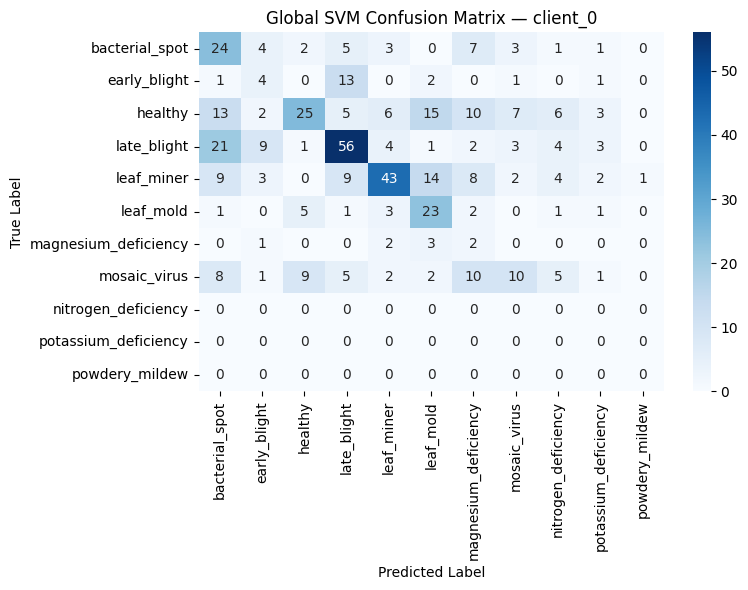

--- Evaluating on client_1 ---
client_1 | Global SVM Accuracy: 0.4640


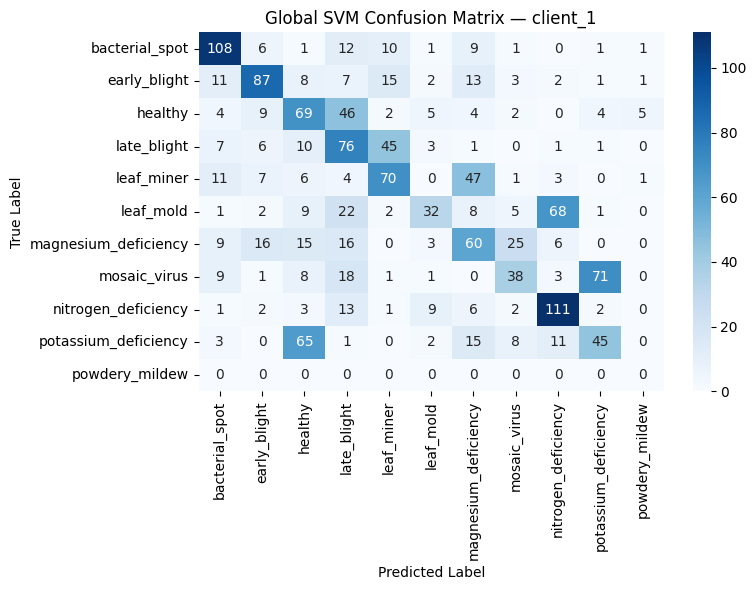

--- Evaluating on client_2 ---
client_2 | Global SVM Accuracy: 0.4365


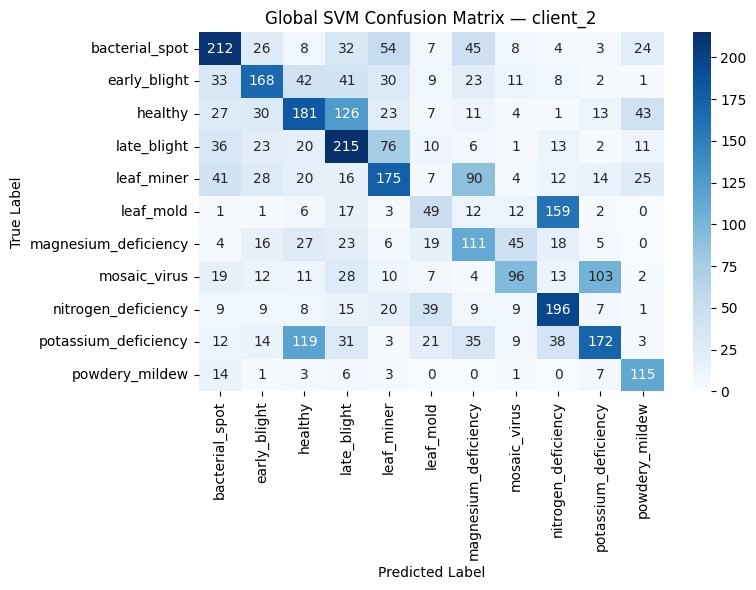

--- Evaluating on client_3 ---
client_3 | Global SVM Accuracy: 0.4779


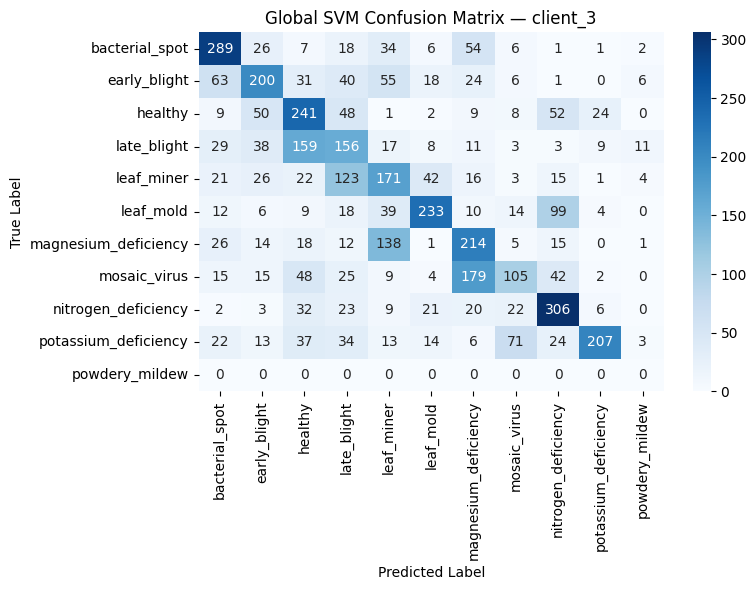

In [59]:
print("\n===== GLOBAL SVM : PER-CLIENT TEST EVALUATION =====\n")

for cid in clients:
    print(f"--- Evaluating on {cid} ---")

    # 1. Load client model
    model = load_client_model(f"/content/models/{cid}.pth")
    model.eval()

    # 2. Load client test set
    _, _, test_loader, *_ = get_dataloaders(f"{BASE}/{cid}")

    # 3. Extract features
    X_test, y_test = extract_features_from_loader(model, test_loader)

    # 4. Apply SAME scaler used at server
    X_test = scaler.transform(X_test)

    # 5. Predict using GLOBAL SVM
    y_pred = svm.predict(X_test)

    # 6. Accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f"{cid} | Global SVM Accuracy: {acc:.4f}")

    # 7. Confusion Matrix
    plot_confusion_matrix(
        y_test,
        y_pred,
        classes=le.classes_,
        title=f"Global SVM Confusion Matrix — {cid}"
    )

**Confusion Matrix**


====== GLOBAL SVM + CONFUSION MATRIX (PER CLIENT) ======


--- client_0 ---
Global SVM Accuracy: 0.4056


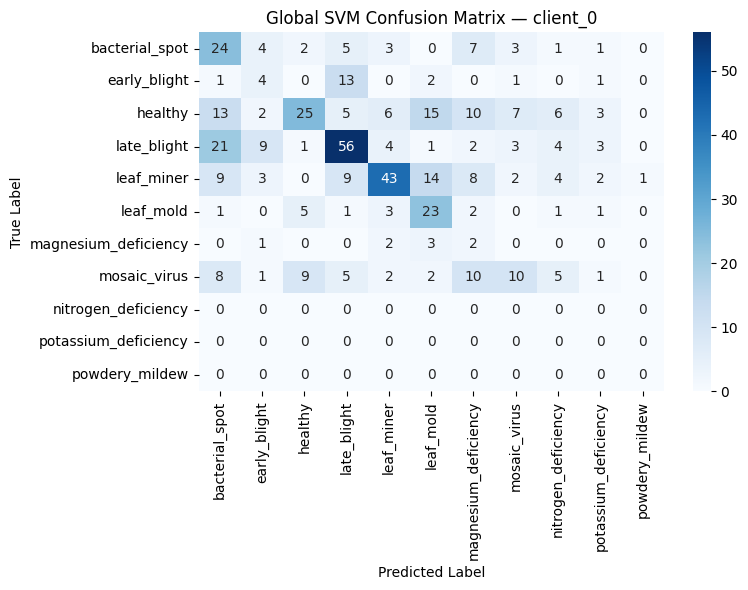


--- client_1 ---
Global SVM Accuracy: 0.4640


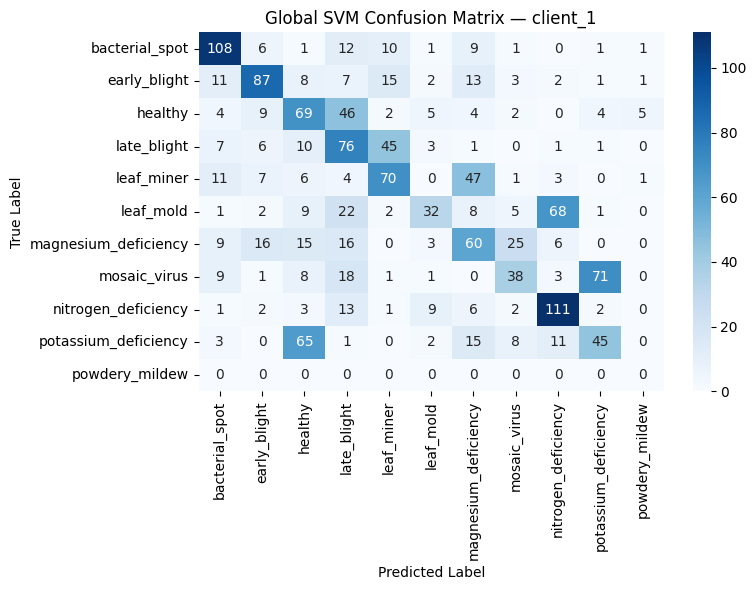


--- client_2 ---
Global SVM Accuracy: 0.4365


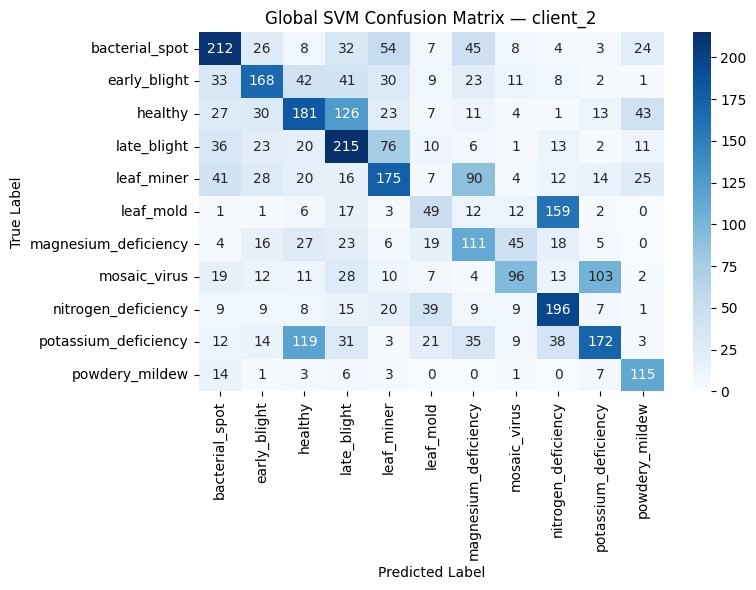


--- client_3 ---
Global SVM Accuracy: 0.4779


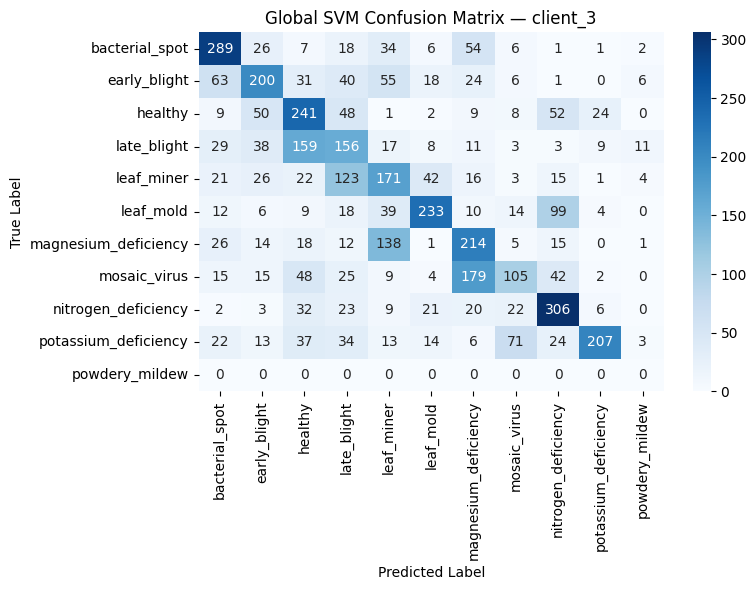

In [60]:
print("\n====== GLOBAL SVM + CONFUSION MATRIX (PER CLIENT) ======\n")

for cid in clients:
    print(f"\n--- {cid} ---")

    # Load client model
    model = load_client_model(f"/content/models/{cid}.pth")

    # Load test data
    _, _, test_loader, *_ = get_dataloaders(f"{BASE}/{cid}")

    # Reuse your function
    X_test, y_test = extract_features_from_loader(model, test_loader)

    # Normalize
    X_test = scaler.transform(X_test)

    # True labels (global index)
    y_true = np.array(y_test)

    # SVM predictions
    y_pred_enc = svm.predict(X_test)

    # Accuracy
    acc = accuracy_score(y_true, y_pred_enc)
    print(f"Global SVM Accuracy: {acc:.4f}")

    # Confusion matrix
    plot_confusion_matrix(
        y_true,
        y_pred_enc,
        classes=le.classes_,
        title=f"Global SVM Confusion Matrix — {cid}"
    )

In [61]:
print("\n===== PER-CLIENT LOCAL SVM EVALUATION =====\n")

client_svms = {}

for cid in clients:
    print(f"\n--- Training & Evaluating {cid} ---")

    # 1. Load client model
    model = load_client_model(f"/content/models/{cid}.pth")
    model.eval()

    # 2. Load client data
    train_loader, _, test_loader, *_ = get_dataloaders(f"{BASE}/{cid}")

    # 3. Extract TRAIN features
    X_train, y_train = extract_features_from_loader(model, train_loader)

    # 4. Scale (client-local)
    scaler_local = StandardScaler()
    X_train = scaler_local.fit_transform(X_train)

    # 5. Train CLIENT SVM
    svm_local = SVC(kernel="linear", C=1.0)
    svm_local.fit(X_train, y_train)

    # 6. Extract TEST features
    X_test, y_test = extract_features_from_loader(model, test_loader)
    X_test = scaler_local.transform(X_test)

    # 7. Predict
    y_pred = svm_local.predict(X_test)

    # 8. Accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f"{cid} | Local SVM Accuracy: {acc:.4f}")

    client_svms[cid] = svm_local


===== PER-CLIENT LOCAL SVM EVALUATION =====


--- Training & Evaluating client_0 ---
client_0 | Local SVM Accuracy: 0.7180

--- Training & Evaluating client_1 ---
client_1 | Local SVM Accuracy: 0.9280

--- Training & Evaluating client_2 ---
client_2 | Local SVM Accuracy: 0.8913

--- Training & Evaluating client_3 ---
client_3 | Local SVM Accuracy: 0.9205
